# Generalized Linear Models

## Mathematical Intuition

Let $\overline{\beta} = \{\beta_1, \beta_2, \dots, \beta_k\}$ be the vector of regression coefficients.

Let $\overline{x}_i = \{x_1, x_2, \dots, x_k\}$ be the vector of covariates for the $i$th case.

With $n$ observations,

### OLS

$$\argmin_{\beta_0, \overline\beta}\sum_{i=1}^n(y_i - \beta_0 - \overline\beta \cdot \overline{x})^2$$

### LASSO

The LASSO model adds the $L_1$ norm (penalty term?) to the OLS minimization problem:

$$L_1 = \lambda\sum_{j=1}^k |\beta_j|$$

$$\argmin_{\beta_0,\overline\beta}\left\{\sum_{i=1}^n(y_i - \beta_0 - \overline\beta \cdot \overline{x})^2+\lambda\sum_{j=1}^k |\beta_j|\right\}$$

With $\lambda\geq 0$.

### Ridge

The ridge model adds the $L_2$ norm to the OLS minimzation problem:

$$L_2 = \lambda\sum_{j=1}^k (\beta_j)^2$$

$$\argmin_{\beta_0,\overline\beta}\left\{\sum_{i=1}^n(y_i - \beta_0 - \overline\beta \cdot \overline{x})^2+\lambda\sum_{j=1}^k (\beta_j)^2\right\}$$

With $\lambda\geq 0$.

### Elastic Net

The elastic net model adds both the $L_1$ and $L_2$ norms to the OLS minimization problem:

$$\argmin_{\beta_0,\overline\beta}\left\{\sum_{i=1}^n(y_i - \beta_0 - \overline\beta \cdot \overline{x})^2+\alpha_1\sum_{j=1}^k |\beta_j|+\alpha_2\sum_{j=1}^k (\beta_j)^2\right\}$$

With $\alpha_1,\alpha_2\geq 0$.

## Coding Models

Sources:
* https://scikit-learn.org/stable/modules/linear_model.html
* https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_coordinate_descent_path.html#sphx-glr-auto-examples-linear-model-plot-lasso-coordinate-descent-path-py
* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
* https://scikit-learn.org/stable/auto_examples/linear_model/plot_ridge_path.html#sphx-glr-auto-examples-linear-model-plot-ridge-path-py
* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import datasets
from sklearn import linear_model

diabX, diabY = datasets.load_diabetes(return_X_y = True)

### LASSO Model

`Lasso(alpha)`
* `alpha` sets the weight of the $L_1$ parameter. If `alpha=0`, then `Lasso` produces OLS (not recommended)
* Need to use other methods (like `fit()` or `predict()`) to actually get coefficients

`lasso_path(X, y, eps, n_alphas, alphas, ...)`
* It seems like `lasso_path` is used when you want to get the results of multiple alphas
* `eps` affects the length of the paths; smaller numbers produce longer paths (defaults to `1e-3`)
* `lasso_path` returns a tuple: the alphas used, the coefficients produced, "the dual gaps at the end of the optimization for each alpha," and the number of iterations.

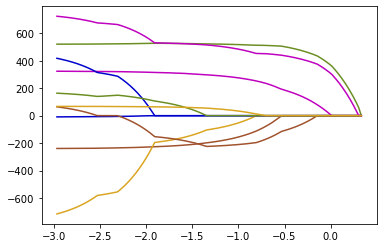

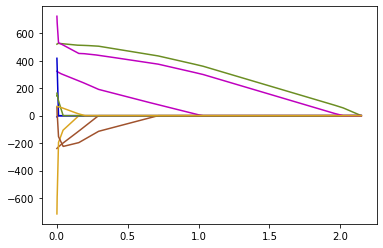

In [19]:
alphas, coefs, _ = linear_model.lasso_path(diabX, diabY, n_alphas = 250, eps = 5e-4)

# because alphas and coefs are stored in separate array objects, it makes more sense to use Matplotlib than to try to wrangle them into a single data frame for seaborn
plt.figure(1)

# It looks bad without the log transformation
plot_alphas = np.log10(alphas)

colors = cycle(["mediumblue", "sienna", "olivedrab", "m", "goldenrod"])

for coef, col in zip(coefs, colors):
    l1 = plt.plot(plot_alphas, coef, c = col) # adds a line showing how the coefficient for each covariate changes as log(alpha) increases

# This figure shows how the coefficients converge to zero as alpha increases (same idea as above)
plt.figure(2)
for coef, col in zip(coefs, colors):
    l1 = plt.plot(alphas, coef, c = col)

Scatter plots with LASSO regression lines plotted on top (`alpha = 0.1`):

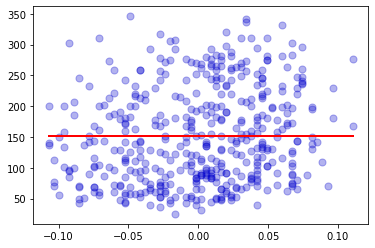

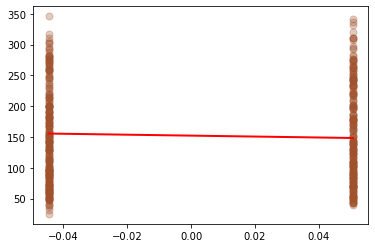

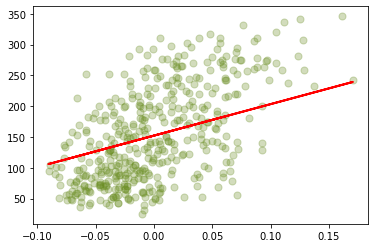

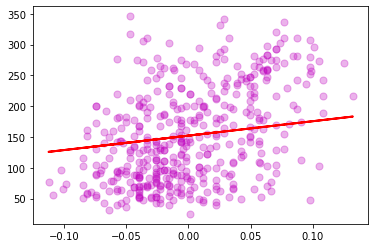

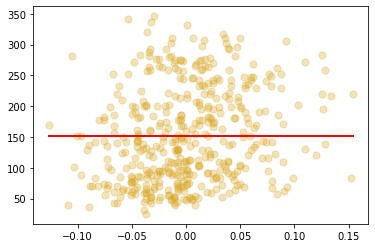

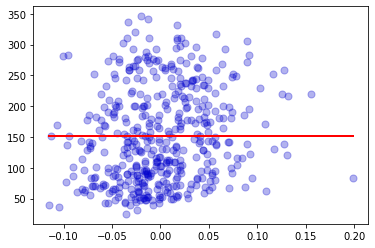

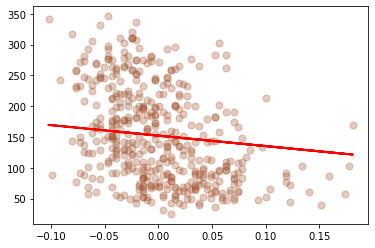

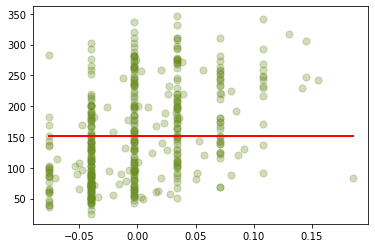

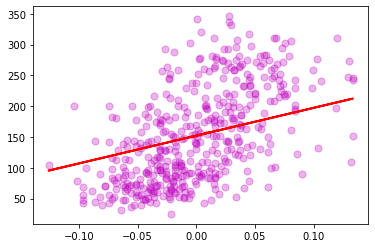

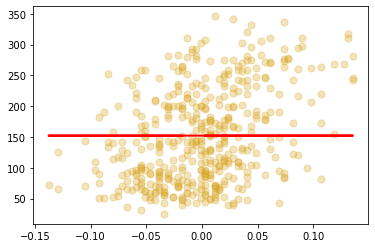

In [15]:
alpha = 0.2

lasso = linear_model.Lasso(alpha)
fitted = lasso.fit(diabX, diabY)

# function for plotting LASSO line
def f(x, index):
   return fitted.intercept_ + (fitted.coef_[index] * x)

# scatter plots showing what the relationships that LASSO is modeling actually look like
for index, color in zip(range(len(diabX[0])), colors):
    plt.figure(index + 3) # create new plot
    plt.scatter(diabX[:, index], diabY, c = color, s = 50, alpha = 0.3) # scatter plot
    plt.plot(diabX[:, index], f(diabX[:, index], index), linewidth = 2, c = "red") # lasso line

### Ridge Model

`Ridge(alpha)`
* `alpha` sets the weight of the $L_1$ parameter. If `alpha=0`, then `Lasso` produces OLS (not recommended)
* Need to use other methods (like `fit()` or `predict()`) to actually get coefficients

There is not an analagous method to `lasso_path` for getting the results of multiple `alphas` at once, so we will need to use a `for` loop instead.

(0.0, 50.0)

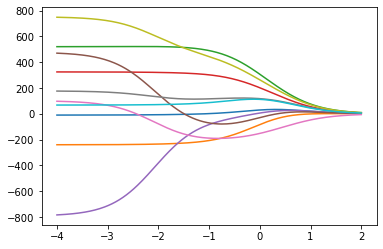

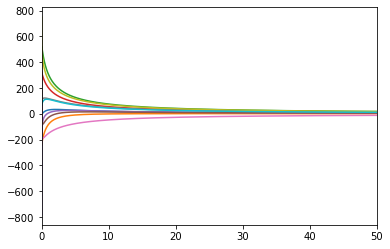

In [21]:
# get 250 values of alpha
n_alphas = 250
alphas = np.logspace(-4, 2, n_alphas)

# save ridge results to list
coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha = a).fit(diabX, diabY)
    coefs.append(ridge.coef_)

# Plot #1
plt.figure(1)
plot_alphas = np.log10(alphas)
plt.gca().plot(plot_alphas, coefs)

# Plot #2
plt.figure(2)
plt.gca().plot(alphas, coefs)
plt.gca().set_xlim([0, 50])

Scatter plots with Ridge regression lines plotted on top (`alpha = 0.4`):

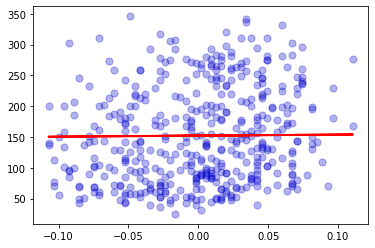

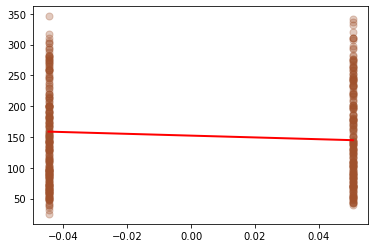

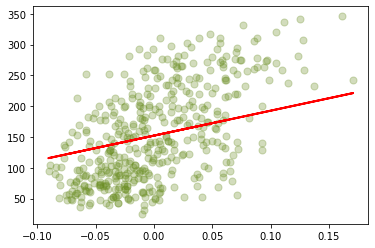

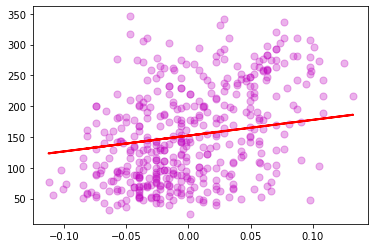

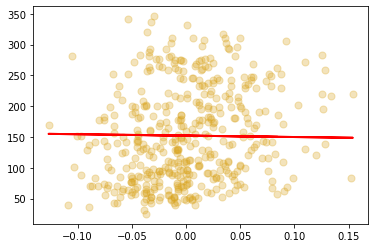

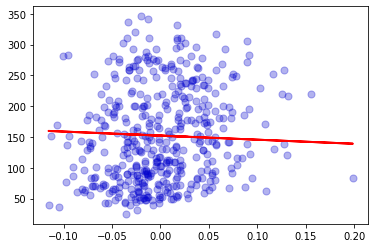

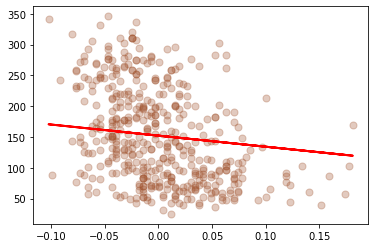

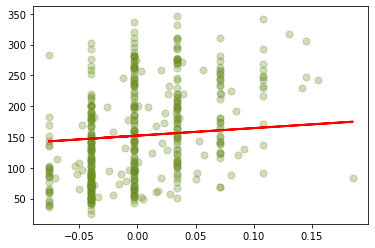

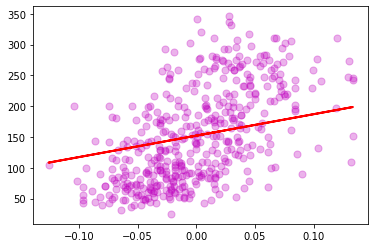

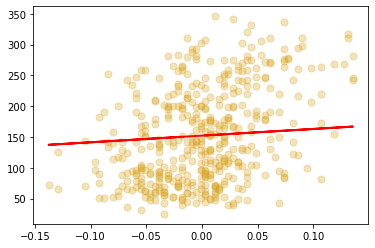

In [6]:
alpha = 0.4

ridge = linear_model.Ridge(alpha)
fitted = ridge.fit(diabX, diabY)

# function for plotting ridge line
def f(x, index):
   return fitted.intercept_ + (fitted.coef_[index] * x)

# scatter plots showing what the relationships that ridge is modeling actually look like
for index, color in zip(range(len(diabX[0])), colors):
    plt.figure(index + 3) # create new plot
    plt.scatter(diabX[:, index], diabY, c = color, s = 50, alpha = 0.3) # scatter plot
    plt.plot(diabX[:, index], f(diabX[:, index], index), linewidth = 2, c = "red") # ridge line

### Elastic Net Model

Elastic net in `scikit-learn` is more similar to Lasso: there is a function for generating a specific model (`ElasticNet`) and a function for getting the *path* of the coefficients compared to the `alpha` level (`enet_path`).

`ElasticNet(alpha, l1_ratio)`
* `alpha` sets the weight of the $L_1$ parameter. If `alpha=0`, then `ElasticNet` produces OLS (not recommended)
* `l1_ratio` is a number between 0 and 1 specifying how much weight should be placed on the $L_1$ norm compared to the $L_2$ norm; `l1_ratio = 1` produces Lasso, `l1_ratio = 0` produces ridge
* Need to use other methods (like `fit()` or `predict()`) to actually get coefficients

`enet_path(X, y, l1_ratio, eps, n_alphas)`
* `eps` affects the length of the paths; smaller numbers produce longer paths (defaults to `1e-3`)
* `n_alphas` is the number of alphas to try
* `l1_ratio` is a number between 0 and 1 specifying how much weight should be placed on the $L_1$ norm compared to the $L_2$ norm

Can force the coefficients to be positive by adding `positive = True` to either of these functions. *What is the use case for this?*

(0.0, 1.0)

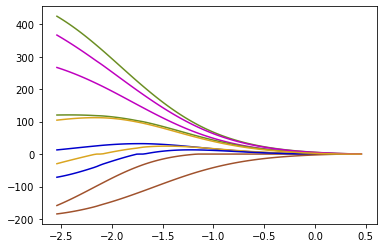

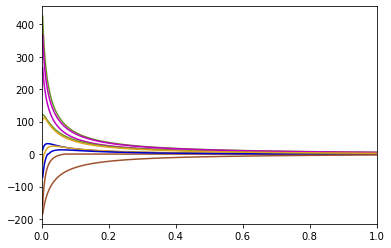

In [26]:
alphas, coefs, _ = linear_model.enet_path(diabX, diabY, l1_ratio = 0.75)

plot_alphas = np.log10(alphas)

for coef, col in zip(coefs, colors):
    l1 = plt.plot(plot_alphas, coef, c = col) # adds a line showing how the coefficient for each covariate changes as log(alpha) increases


# This figure shows how the coefficients converge to zero as alpha increases (same idea as above)
plt.figure(2)
for coef, col in zip(coefs, colors):
    l1 = plt.plot(alphas, coef, c = col)
plt.xlim([0, 1])

Scatter plots with elastic net regression lines plotted on top (`alpha = 0.05`, `l1_ratio = 0.9`):

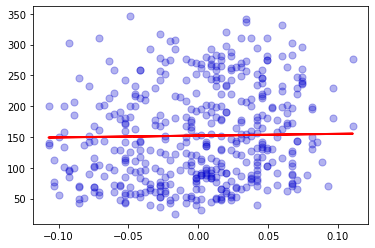

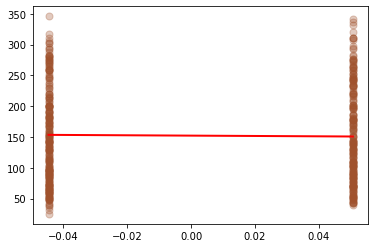

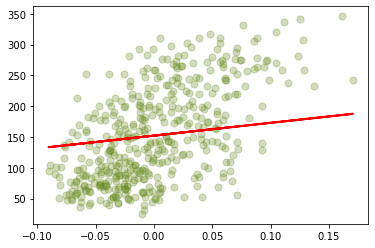

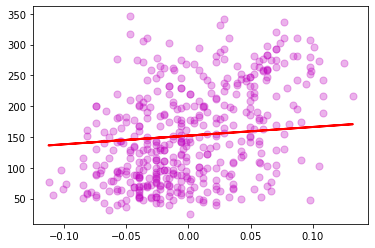

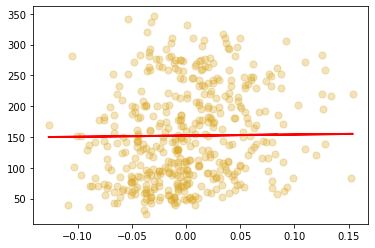

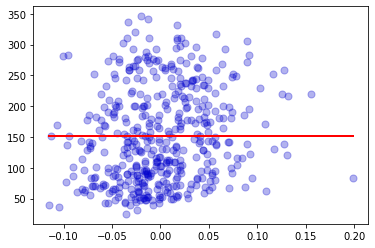

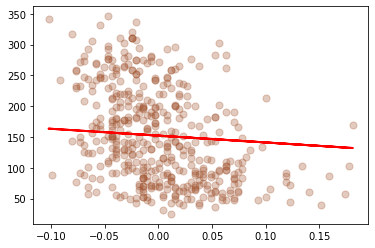

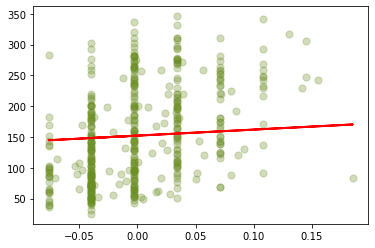

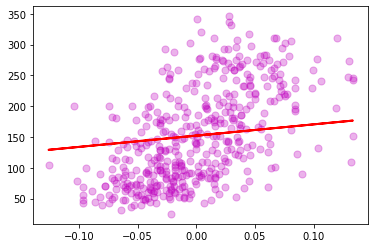

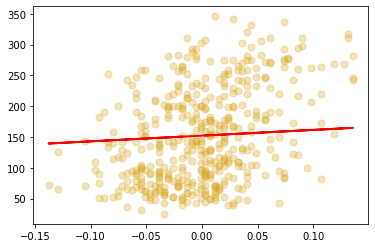

In [8]:
alpha = 0.05

en = linear_model.ElasticNet(alpha = alpha, l1_ratio = 0.9)
fitted = en.fit(diabX, diabY)

# function for plotting LASSO line
def f(x, index):
   return fitted.intercept_ + (fitted.coef_[index] * x)

# scatter plots showing what the relationships that LASSO is modeling actually look like
for index, color in zip(range(len(diabX[0])), colors):
    plt.figure(index + 3) # create new plot
    plt.scatter(diabX[:, index], diabY, c = color, s = 50, alpha = 0.3) # scatter plot
    plt.plot(diabX[:, index], f(diabX[:, index], index), linewidth = 2, c = "red") # lasso line